In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [15]:
# import statements
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt


In [16]:


## Basic Parameter


RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)


In [17]:


data_df = pd.read_csv('StudentsPerformance.csv')
data_df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
data_df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [27]:
data_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [35]:
for col in data_df.columns:
    print(f'{col}:{data_df[col].unique()}')

gender:['female' 'male']
race/ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch:['standard' 'free/reduced']
test preparation course:['none' 'completed']
math score:[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score:[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score:[ 74  88  93  44  75  78  92 

In [21]:
data_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

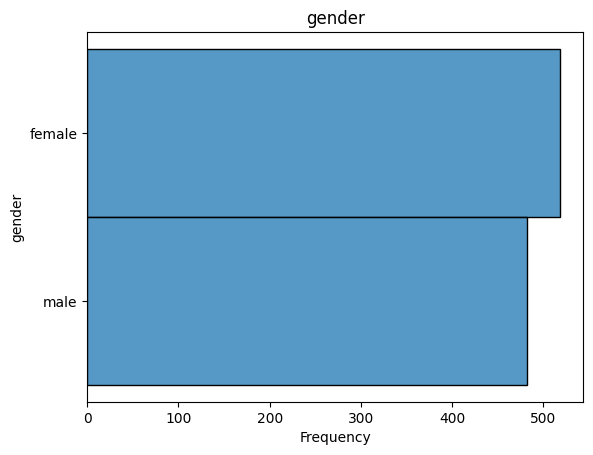

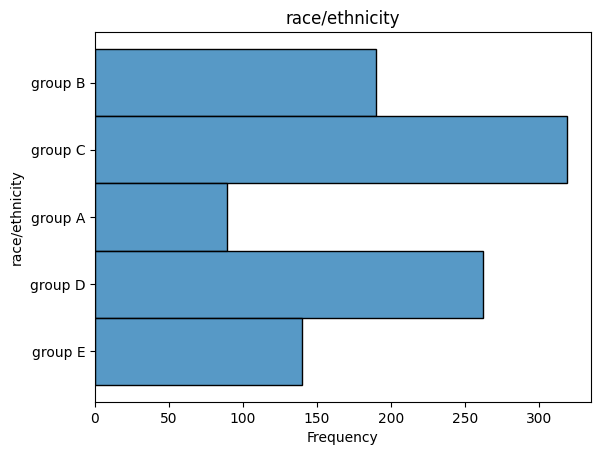

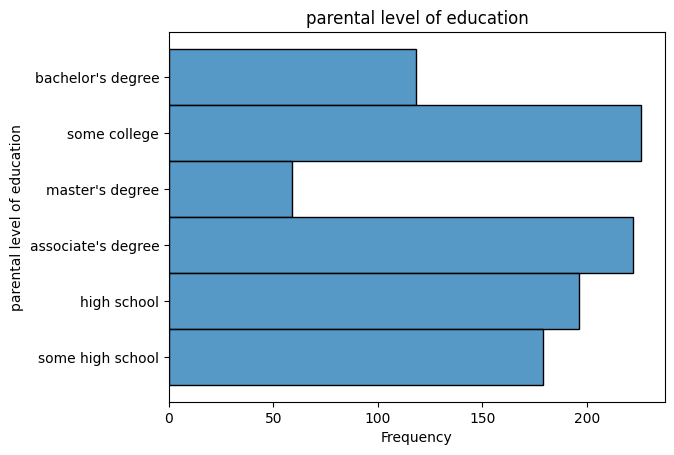

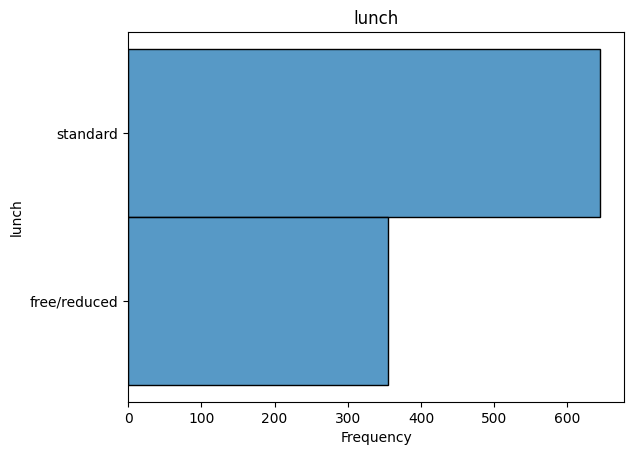

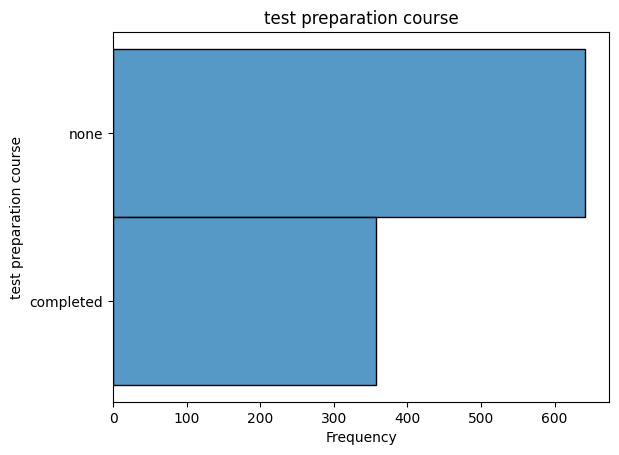

In [25]:
import seaborn as sns

cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']

for count, col in enumerate(cat_cols):
    fig, ax = plt.subplots()
    colCount = data_df[col].value_counts()
    ax.set_title(col)
    ax.set_xlabel('Frequency')
    
    #sns.countplot(data_fg, y = col, ax = ax)
    sns.histplot(data_df, y = col, ax = ax)

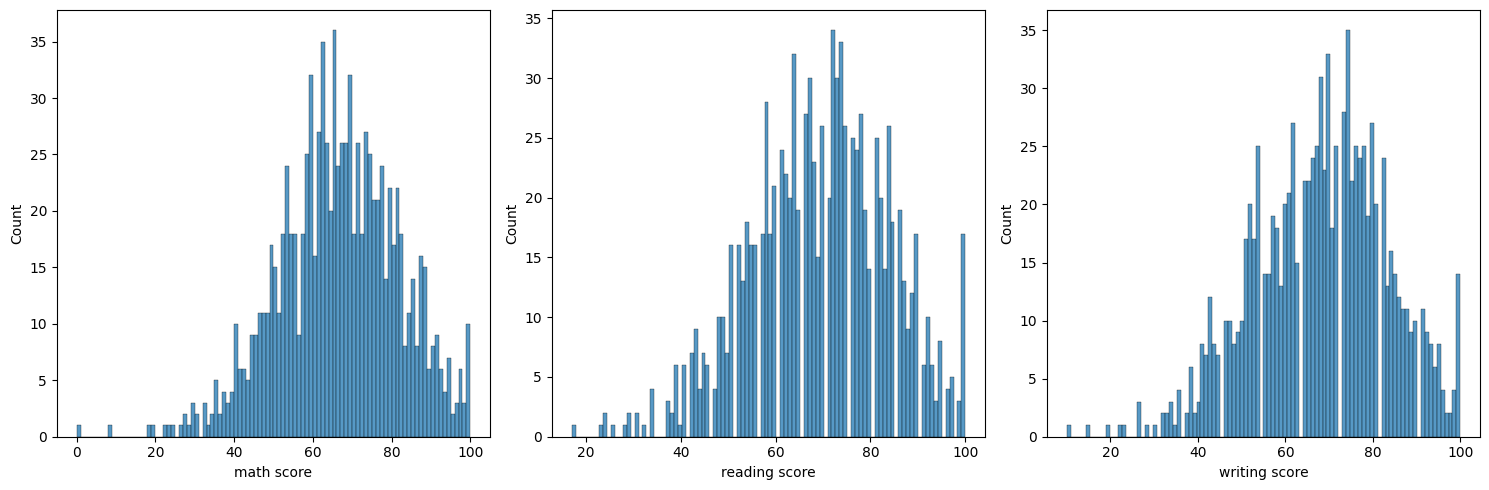

In [39]:
num_cols = ['math score', 'reading score',
       'writing score']

fig, axes = plt.subplots(1, 3, figsize=(15,5))

for count, col in enumerate(num_cols):
    
    ax = axes[count]
    
    sns.histplot(data_df, x = col, ax = ax, bins = 100)  # changes bins = 20, bins = 50
    
plt.tight_layout()

In [40]:
data_df[['gender', 'math score']].groupby(['gender'], as_index = False).mean()

,gender,math score
0,female,63.633205
1,male,68.728216


In [42]:
data_df[['gender', 'reading score']].groupby(['gender'], as_index = False).mean()

,gender,reading score
0,female,72.608108
1,male,65.473029


In [43]:
data_df[['gender', 'writing score']].groupby(['gender'], as_index = False).mean()

,gender,writing score
0,female,72.467181
1,male,63.311203


<Axes: xlabel='gender'>

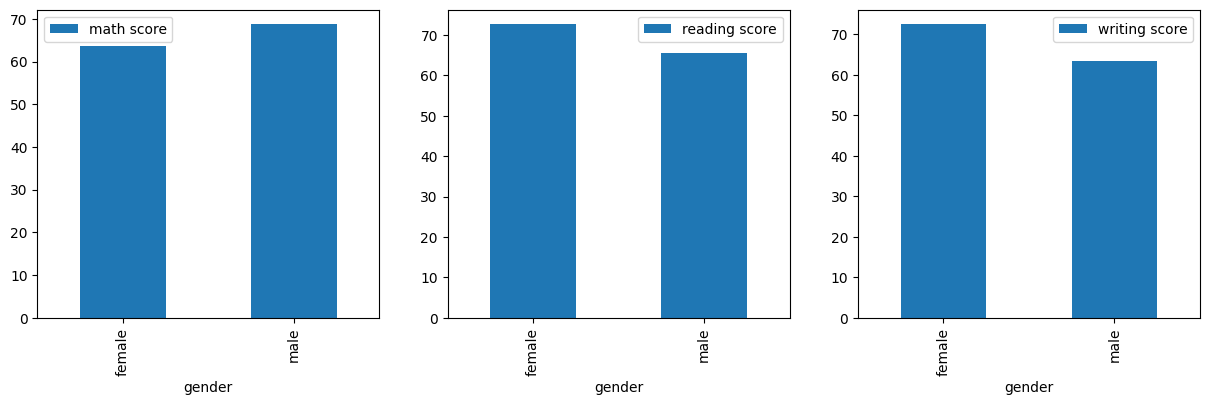

In [45]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
data_df[['gender', 'math score']].groupby(['gender']).mean().plot(kind = 'bar', 
                                                                  ax = axes[0])
data_df[['gender', 'reading score']].groupby(['gender']).mean().plot(kind = 'bar', 
                                                                     ax = axes[1])
data_df[['gender', 'writing score']].groupby(['gender']).mean().plot(kind = 'bar', 
                                                                     ax = axes[2])

<Axes: xlabel='race/ethnicity'>

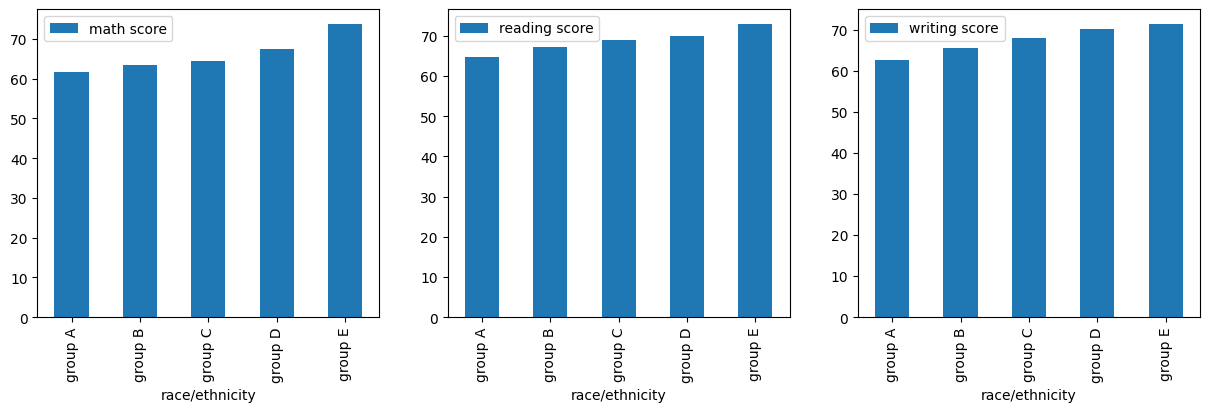

In [53]:
col = 'race/ethnicity'

fig, axes = plt.subplots(1, 3, figsize = (15, 4))

data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', 
                                                                  ax = axes[0])
data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', 
                                                                     ax = axes[1])
data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', 
                                                                     ax = axes[2])

<Axes: xlabel='parental level of education'>

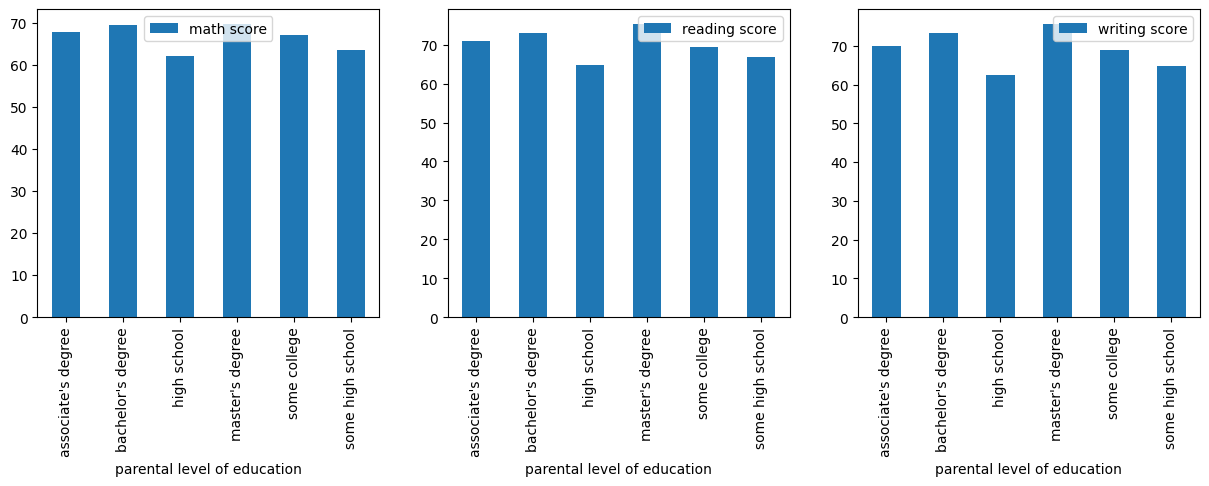

In [54]:
col = 'parental level of education'

fig, axes = plt.subplots(1, 3, figsize = (15, 4))

data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', 
                                                                  ax = axes[0])
data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', 
                                                                     ax = axes[1])
data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', 
                                                                     ax = axes[2])

<Axes: xlabel='lunch'>

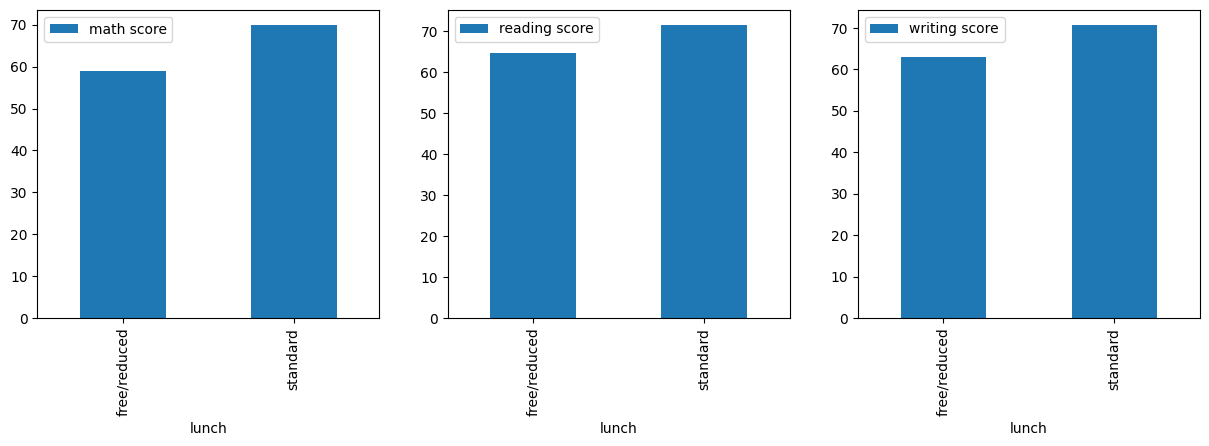

In [55]:
col = 'lunch'

fig, axes = plt.subplots(1, 3, figsize = (15, 4))

data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', 
                                                                  ax = axes[0])
data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', 
                                                                     ax = axes[1])
data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', 
                                                                     ax = axes[2])

<Axes: xlabel='test preparation course'>

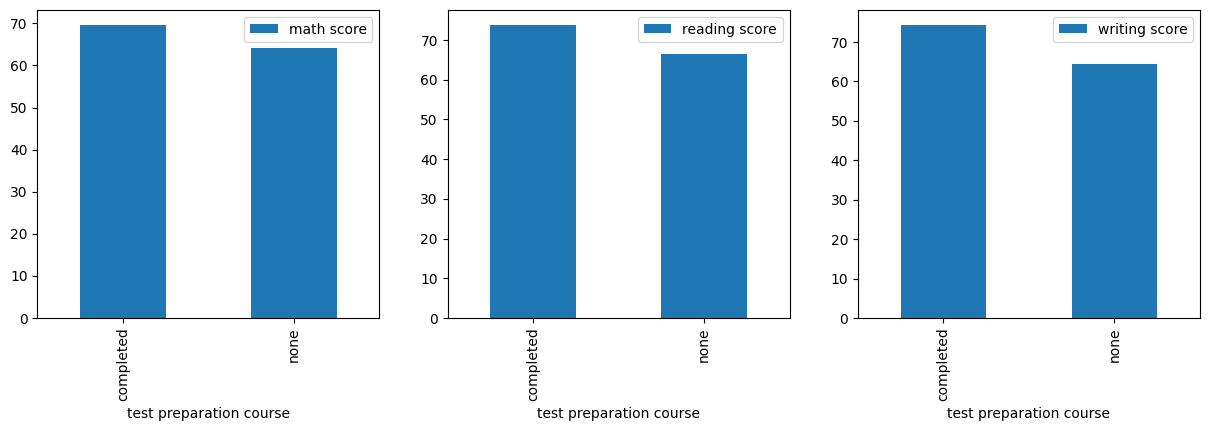

In [56]:
col = 'test preparation course'

fig, axes = plt.subplots(1, 3, figsize = (15, 4))

data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', 
                                                                  ax = axes[0])
data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', 
                                                                     ax = axes[1])
data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', 
                                                                     ax = axes[2])

#box plot

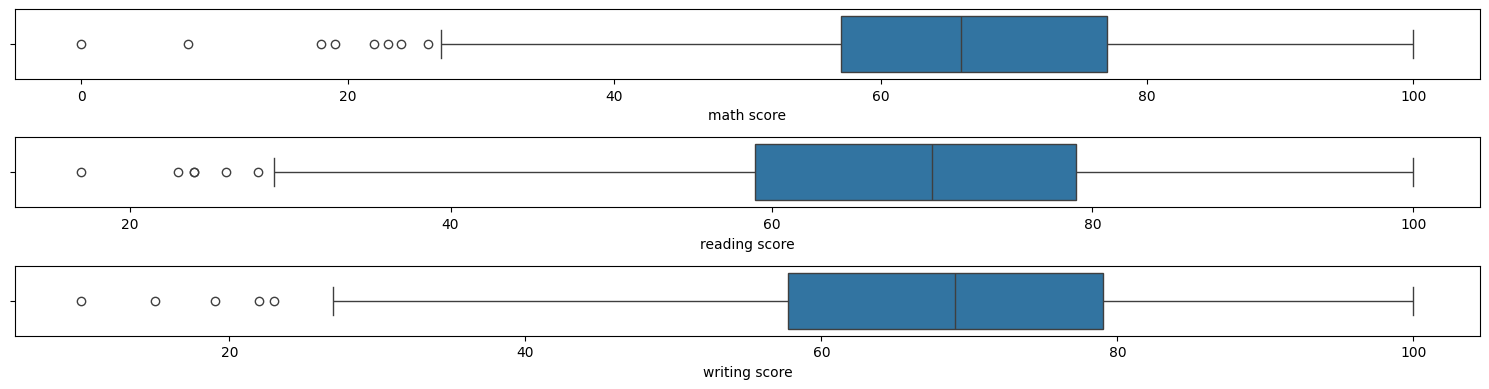

In [59]:
fig, axes = plt.subplots(3, 1, figsize = (15, 4))

sns.boxplot(data = data_df, x = 'math score', ax = axes[0])
sns.boxplot(data = data_df, x = 'reading score', ax = axes[1])       
sns.boxplot(data = data_df, x = 'writing score', ax = axes[2])     
plt.tight_layout()  

In [60]:
Q1 = np.percentile(data_df['math score'], 25)

Q3 = np.percentile(data_df['math score'], 75)

outlier_dis = (Q3 - Q1) * 1.5
outlier_dis

30.0

In [ ]:
# index number of students who are weak in math

In [61]:
outliers = data_df[data_df['math score'] < Q1 - outlier_dis].index
outliers

Index([17, 59, 145, 338, 466, 787, 842, 980], dtype='int64')

In [62]:
from collections import Counter

outlier_list = []

outlier_list.extend( data_df[data_df['math score'] < Q1 - outlier_dis].index )

outlier_list.extend( data_df[data_df['reading score'] < Q1 - outlier_dis].index )

outlier_list.extend( data_df[data_df['writing score'] < Q1 - outlier_dis].index )

outlier_count = Counter(outlier_list)

outlier_count

Counter({59: 3,
         980: 3,
         76: 2,
         327: 2,
         596: 2,
         17: 1,
         145: 1,
         338: 1,
         466: 1,
         787: 1,
         842: 1})

In [63]:
data_df['overall'] = (data_df['math score'] 
                      + data_df['reading score'] 
                      + data_df['writing score']) / 3.0

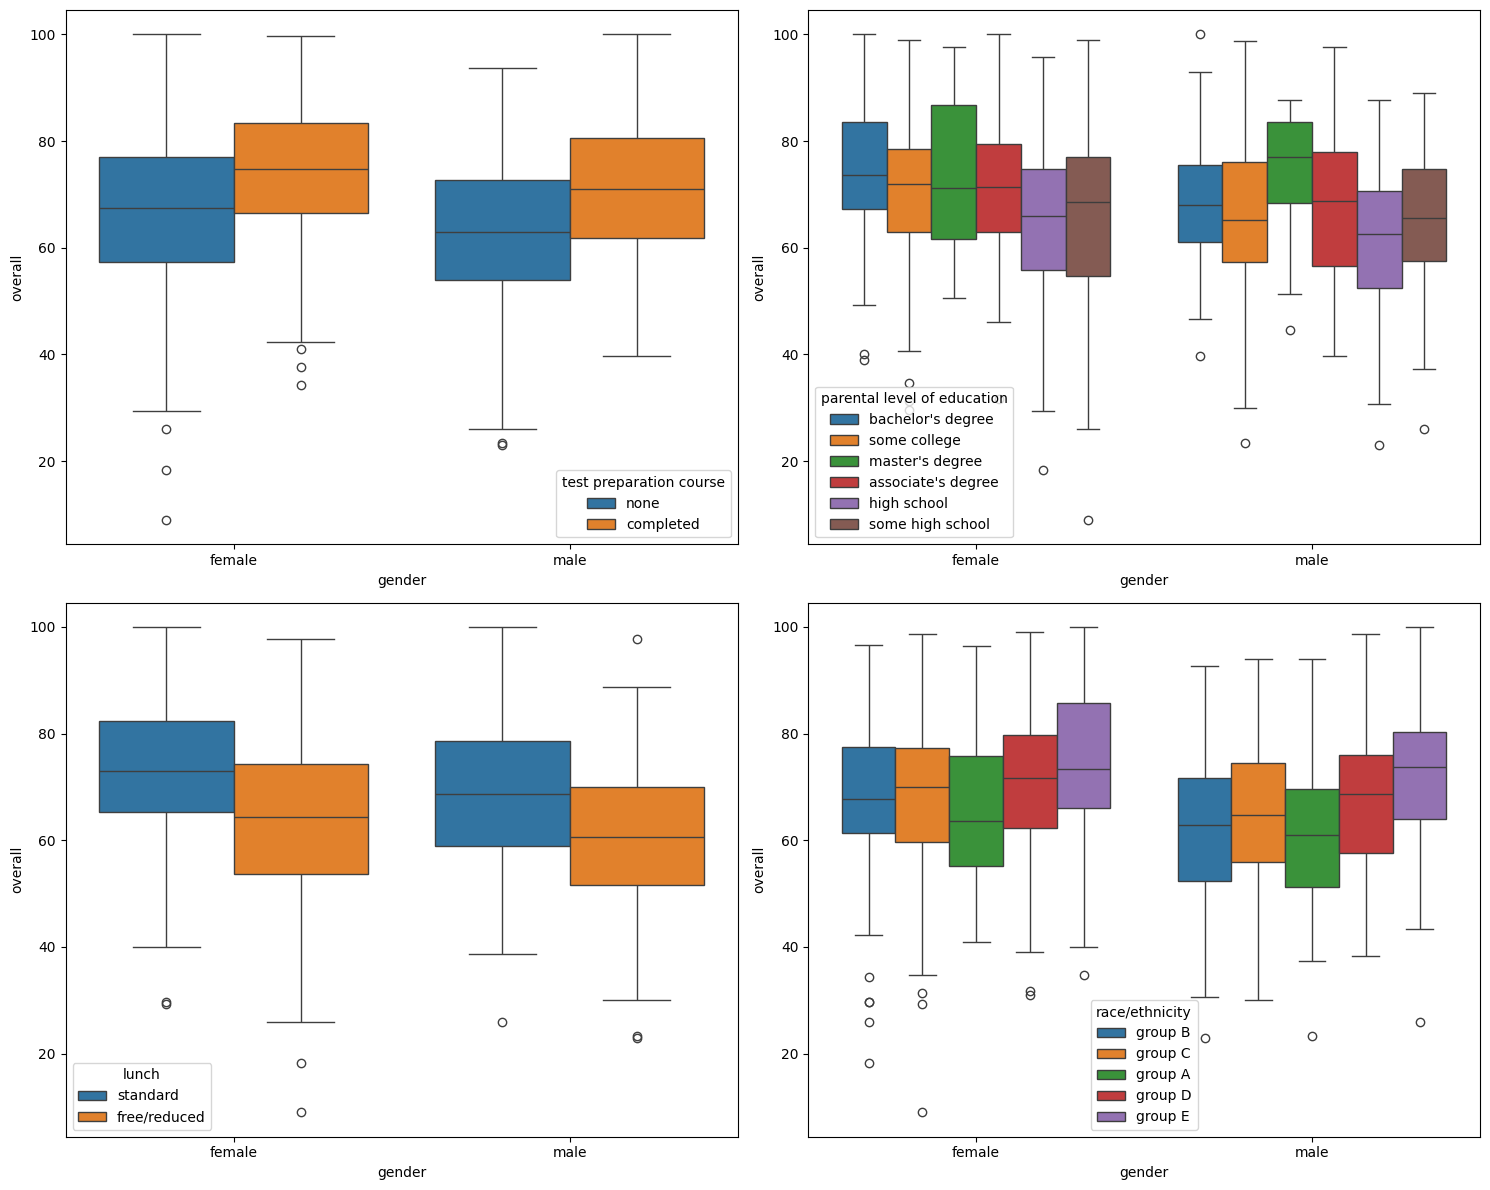

In [73]:
fig = plt.figure(figsize = ( 15, 12))

# Add the first set of axes (subplot 1)
ax = fig.add_subplot(221) # 2 row, 2 column, subplot 1

# plot on ax
sns.boxplot(data = data_df,
            x='gender',
            hue='test preparation course', 
            y='overall',
            ax = ax)


ax = fig.add_subplot(222) 
sns.boxplot(data = data_df,
            x='gender',
            hue='parental level of education', 
            y='overall',
            ax = ax)



ax = fig.add_subplot(223) 
sns.boxplot(data = data_df,x='gender',
            hue='lunch', 
            y='overall',
            ax = ax)



ax = fig.add_subplot(224) 
sns.boxplot(data = data_df,x='gender',
            hue='race/ethnicity', 
            y='overall',
            ax = ax)

plt.tight_layout()

In [74]:
data_df[num_cols].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


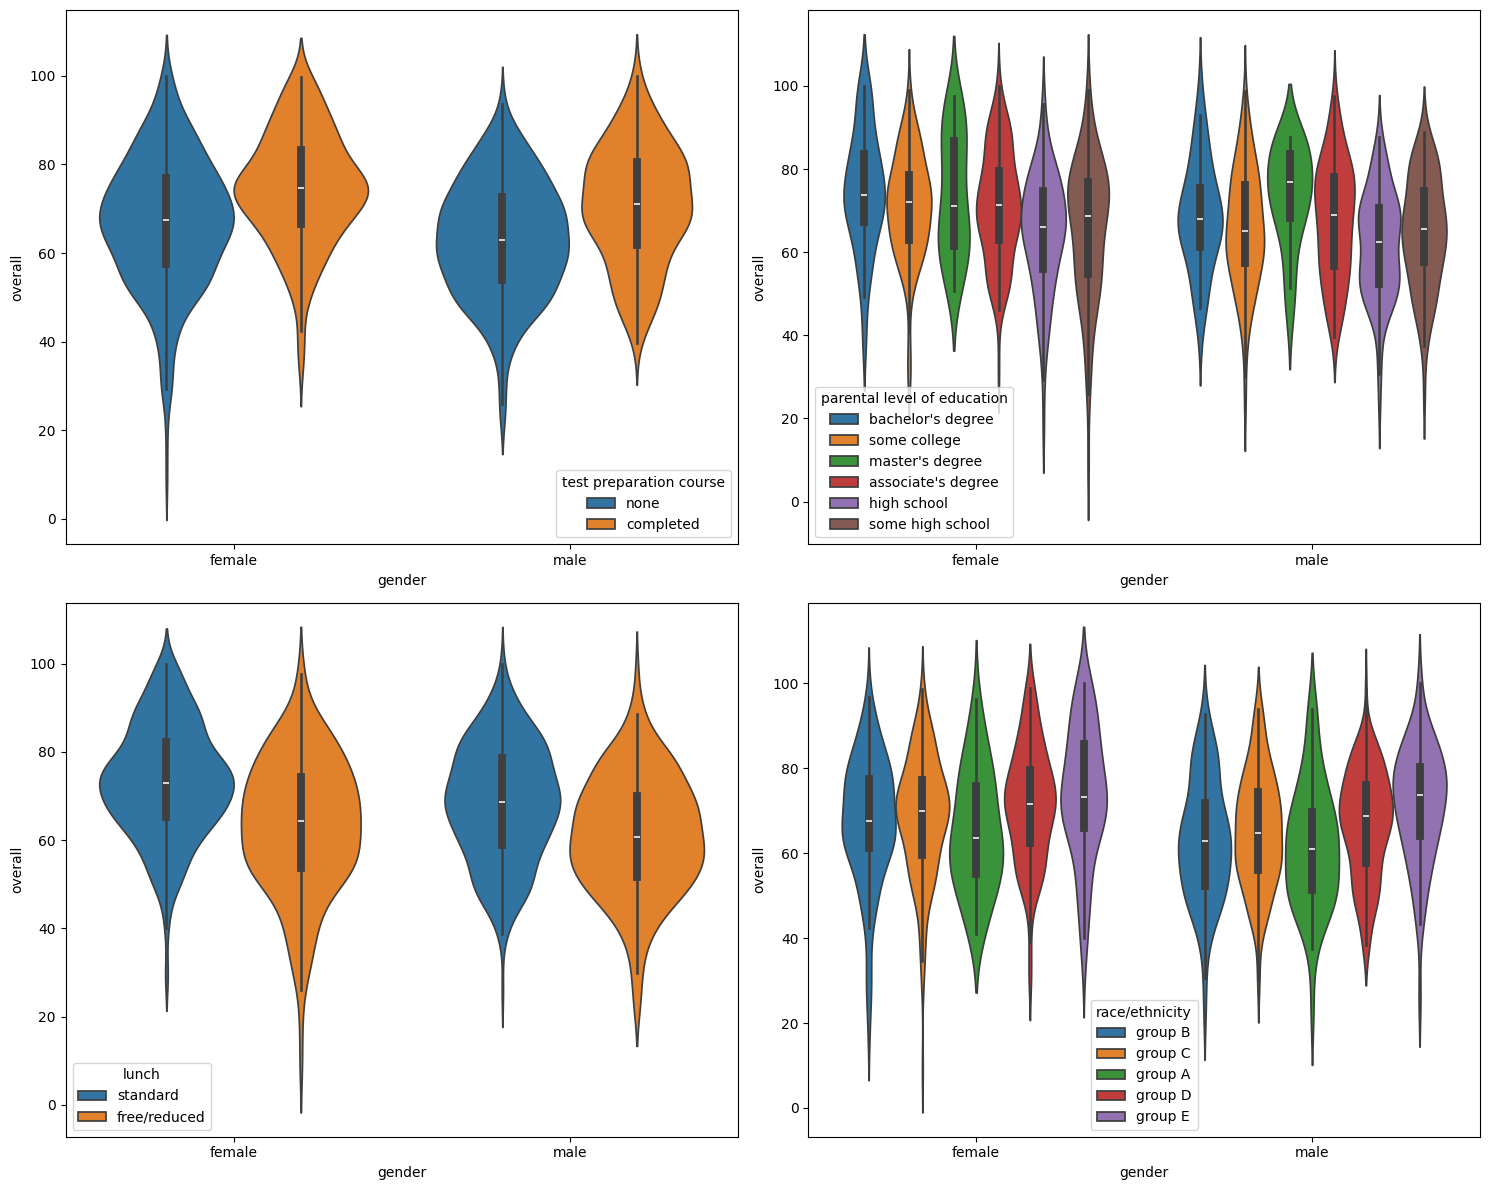

In [75]:
fig = plt.figure(figsize = ( 15, 12))

# Add the first set of axes (subplot 1)
ax = fig.add_subplot(221) # 2 row, 2 column, subplot 1

# plot on ax
sns.violinplot(data = data_df,
            x='gender',
            hue='test preparation course', 
            y='overall',
            ax = ax)


ax = fig.add_subplot(222) 
sns.violinplot(data = data_df,
            x='gender',
            hue='parental level of education', 
            y='overall',
            ax = ax)



ax = fig.add_subplot(223) 
sns.violinplot(data = data_df,x='gender',
            hue='lunch', 
            y='overall',
            ax = ax)



ax = fig.add_subplot(224) 
sns.violinplot(data = data_df,x='gender',
            hue='race/ethnicity', 
            y='overall',
            ax = ax)

plt.tight_layout()

EDA - Exploring Data Analysis